In [1]:
# *--------------------------------Car Insurance Claim Dataset Analysis---------------------*
![](http://www.rayoneindia.com/images/service-5.jpg)

'[]' is not recognized as an internal or external command,
operable program or batch file.


## Importing required libraries 

In [150]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import statsmodels.api as sm
from scipy import stats 
from sklearn import metrics 
from sklearn.metrics import mean_squared_error,mean_absolute_error, make_scorer,classification_report,confusion_matrix,accuracy_score,roc_auc_score,roc_curve
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split,cross_val_score,KFold
from sklearn.linear_model import LinearRegression,LogisticRegression,Ridge 
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
from scipy.stats.stats import pearsonr

## Loading the data

In [96]:
df = pd.read_excel('data/car_insurance_claim.xlsx')

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10302 entries, 0 to 10301
Data columns (total 27 columns):
ID            10302 non-null int64
KIDSDRIV      10302 non-null int64
BIRTH         10302 non-null datetime64[ns]
AGE           10295 non-null float64
HOMEKIDS      10302 non-null int64
YOJ           9754 non-null float64
INCOME        9732 non-null float64
PARENT1       10302 non-null object
HOME_VAL      9727 non-null float64
MSTATUS       10302 non-null object
GENDER        10302 non-null object
EDUCATION     10302 non-null object
OCCUPATION    9637 non-null object
TRAVTIME      10302 non-null int64
CAR_USE       10302 non-null object
BLUEBOOK      10302 non-null int64
TIF           10302 non-null int64
CAR_TYPE      10302 non-null object
RED_CAR       10302 non-null object
OLDCLAIM      10302 non-null int64
CLM_FREQ      10302 non-null int64
REVOKED       10302 non-null object
MVR_PTS       10302 non-null int64
CLM_AMT       10302 non-null int64
CAR_AGE       9663 non-null f

## Exploratory data analysis

In [98]:
df.head(5)

ID  KIDSDRIV      BIRTH   AGE  HOMEKIDS   YOJ   INCOME PARENT1  \
0   63581743         0 1939-03-16 60.00         0 11.00 67349.00      No   
1  132761049         0 1956-01-21 43.00         0 11.00 91449.00      No   
2  921317019         0 1951-11-18 48.00         0 11.00 52881.00      No   
3  727598473         0 1964-03-05 35.00         1 10.00 16039.00      No   
4  450221861         0 1948-06-05 51.00         0 14.00      nan      No   

   HOME_VAL MSTATUS         ...          CAR_TYPE RED_CAR OLDCLAIM  CLM_FREQ  \
0      0.00      No         ...           Minivan     yes     4461         2   
1 257252.00      No         ...           Minivan     yes        0         0   
2      0.00      No         ...               Van     yes        0         0   
3 124191.00     Yes         ...             z_SUV      no    38690         2   
4 306251.00     Yes         ...           Minivan     yes        0         0   

  REVOKED  MVR_PTS  CLM_AMT CAR_AGE CLAIM_FLAG           URBANICITY  
0      No        3        0   18.00          0  Highly Urban/ Urban  
1      No        0        0    1.00          0  Highly Urban/ Urban  
2      No        2        0   10.00          0  Highly Urban/ Urban  
3      No        3        0   10.00          0  Highly Urban/ Urban  
4      No        0        0    6.00          0  Highly Urban/ Urban  

[5 rows x 27 columns]

## Generating descriptive statistics central tendency,dispersion of the dataset
### Supressing scientific notation by setting display format globally

In [99]:
pd.set_option('display.float_format', '{:.2f}'.format)
df.describe().transpose()

count         mean          std      min          25%  \
ID         10302.00 495663109.08 286467479.03 63175.00 244286856.00   
KIDSDRIV   10302.00         0.17         0.51     0.00         0.00   
AGE        10295.00        44.84         8.61    16.00        39.00   
HOMEKIDS   10302.00         0.72         1.12     0.00         0.00   
YOJ         9754.00        10.47         4.11     0.00         9.00   
INCOME      9732.00     61572.07     47457.20     0.00     27584.00   
HOME_VAL    9727.00    154523.02    129188.44     0.00         0.00   
TRAVTIME   10302.00        33.42        15.87     5.00        22.00   
BLUEBOOK   10302.00     15659.92      8428.77  1500.00      9200.00   
TIF        10302.00         5.33         4.11     1.00         1.00   
OLDCLAIM   10302.00      4033.98      8733.14     0.00         0.00   
CLM_FREQ   10302.00         0.80         1.15     0.00         0.00   
MVR_PTS    10302.00         1.71         2.16     0.00         0.00   
CLM_AMT    10302.00      1511.27      4725.25     0.00         0.00   
CAR_AGE     9663.00         8.30         5.71    -3.00         1.00   
CLAIM_FLAG 10302.00         0.27         0.44     0.00         0.00   

                    50%          75%          max  
ID         497004293.00 739455069.00 999926368.00  
KIDSDRIV           0.00         0.00         4.00  
AGE               45.00        51.00        81.00  
HOMEKIDS           0.00         1.00         5.00  
YOJ               11.00        13.00        23.00  
INCOME         53529.00     86166.00    367030.00  
HOME_VAL      160661.00    238256.00    885282.00  
TRAVTIME          33.00        44.00       142.00  
BLUEBOOK       14400.00     20890.00     69740.00  
TIF                4.00         7.00        25.00  
OLDCLAIM           0.00      4647.50     57037.00  
CLM_FREQ           0.00         2.00         5.00  
MVR_PTS            1.00         3.00        13.00  
CLM_AMT            0.00      1144.75    123247.00  
CAR_AGE            8.00        12.00        28.00  
CLAIM_FLAG         0.00         1.00         1.00

### Checking for the Categorical Columns

In [100]:
df.describe(include=['O'])

PARENT1 MSTATUS GENDER      EDUCATION     OCCUPATION  CAR_USE CAR_TYPE  \
count    10302   10302  10302          10302           9637    10302    10302   
unique       2       2      2              5              8        2        6   
top         No     Yes      F  z_High School  z_Blue Collar  Private    z_SUV   
freq      8959    6188   5545           2952           2288     6513     2883   

       RED_CAR REVOKED           URBANICITY  
count    10302   10302                10302  
unique       2       2                    2  
top         no      No  Highly Urban/ Urban  
freq      7326    9041                 8230

## Cleaning dataset
### Checking for total Null values per column,if any

In [101]:
df.isnull().sum()

ID              0
KIDSDRIV        0
BIRTH           0
AGE             7
HOMEKIDS        0
YOJ           548
INCOME        570
PARENT1         0
HOME_VAL      575
MSTATUS         0
GENDER          0
EDUCATION       0
OCCUPATION    665
TRAVTIME        0
CAR_USE         0
BLUEBOOK        0
TIF             0
CAR_TYPE        0
RED_CAR         0
OLDCLAIM        0
CLM_FREQ        0
REVOKED         0
MVR_PTS         0
CLM_AMT         0
CAR_AGE       639
CLAIM_FLAG      0
URBANICITY      0
dtype: int64

In [102]:
df['CAR_AGE'].fillna(df['CAR_AGE'].mean(),inplace = True)
df['INCOME'].fillna(df['INCOME'].mean(),inplace = True)
df['HOME_VAL'].fillna(df['HOME_VAL'].mean(),inplace = True)
df['YOJ'].fillna(df['YOJ'].mean(),inplace = True)
df['AGE'].fillna(df['AGE'].mean(),inplace = True)
df['OCCUPATION'].fillna('z_Blue Collar',inplace= True)

In [103]:
df.isnull().sum().any()

False

### Converting Binary Categorical Columns into '1' and '0'

In [104]:
def convertToBin(x):
    if x in ['Yes','yes','M','Highly Urban/ Urban','Private']:
        return 0
    else:
        return 1

In [105]:
df['MSTATUS'] = df['MSTATUS'].apply(lambda x: convertToBin(x))
df['GENDER'] = df['GENDER'].apply(lambda x: convertToBin(x))
df['RED_CAR'] = df['RED_CAR'].apply(lambda x: convertToBin(x))
df['URBANICITY'] = df['URBANICITY'].apply(lambda x: convertToBin(x))
df['PARENT1'] = df['PARENT1'].apply(lambda x: convertToBin(x))
df['REVOKED'] = df['REVOKED'].apply(lambda x: convertToBin(x))
df['CAR_USE'] = df ['CAR_USE'].apply(lambda x: convertToBin(x))


In [106]:
df.head(5)

ID  KIDSDRIV      BIRTH   AGE  HOMEKIDS   YOJ   INCOME  PARENT1  \
0   63581743         0 1939-03-16 60.00         0 11.00 67349.00        1   
1  132761049         0 1956-01-21 43.00         0 11.00 91449.00        1   
2  921317019         0 1951-11-18 48.00         0 11.00 52881.00        1   
3  727598473         0 1964-03-05 35.00         1 10.00 16039.00        1   
4  450221861         0 1948-06-05 51.00         0 14.00 61572.07        1   

   HOME_VAL  MSTATUS     ...      CAR_TYPE RED_CAR OLDCLAIM  CLM_FREQ  \
0      0.00        1     ...       Minivan       0     4461         2   
1 257252.00        1     ...       Minivan       0        0         0   
2      0.00        1     ...           Van       0        0         0   
3 124191.00        0     ...         z_SUV       1    38690         2   
4 306251.00        0     ...       Minivan       0        0         0   

   REVOKED  MVR_PTS  CLM_AMT CAR_AGE  CLAIM_FLAG  URBANICITY  
0        1        3        0   18.00           0           0  
1        1        0        0    1.00           0           0  
2        1        2        0   10.00           0           0  
3        1        3        0   10.00           0           0  
4        1        0        0    6.00           0           0  

[5 rows x 27 columns]

In [107]:
#plt.figure(figsize=(10,6))
#sns.pairplot(df,hue ='CAR_AGE')

### Pairwise correlation among columns

In [108]:
df.corr()

ID  KIDSDRIV   AGE  HOMEKIDS   YOJ  INCOME  PARENT1  HOME_VAL  \
ID          1.00      0.00 -0.01      0.01 -0.01   -0.02     0.00     -0.01   
KIDSDRIV    0.00      1.00 -0.08      0.46  0.04   -0.04    -0.20     -0.02   
AGE        -0.01     -0.08  1.00     -0.45  0.14    0.18     0.31      0.20   
HOMEKIDS    0.01      0.46 -0.45      1.00  0.08   -0.16    -0.45     -0.10   
YOJ        -0.01      0.04  0.14      0.08  1.00    0.28     0.04      0.26   
INCOME     -0.02     -0.04  0.18     -0.16  0.28    1.00     0.07      0.55   
PARENT1     0.00     -0.20  0.31     -0.45  0.04    0.07     1.00      0.24   
HOME_VAL   -0.01     -0.02  0.20     -0.10  0.26    0.55     0.24      1.00   
MSTATUS     0.00     -0.04 -0.09     -0.05 -0.14    0.03    -0.47     -0.44   
GENDER     -0.01      0.04 -0.07      0.11 -0.08   -0.11    -0.07     -0.08   
TRAVTIME   -0.00      0.01 -0.00     -0.00 -0.02   -0.05     0.02     -0.03   
CAR_USE     0.02     -0.00 -0.03     -0.01  0.03    0.09    -0.00      0.03   
BLUEBOOK   -0.00     -0.03  0.17     -0.11  0.14    0.42     0.05      0.25   
TIF        -0.01     -0.01 -0.00      0.01  0.02    0.00    -0.01      0.01   
RED_CAR    -0.01      0.04 -0.03      0.07 -0.05   -0.06    -0.04     -0.03   
OLDCLAIM    0.00      0.02 -0.03      0.03 -0.00   -0.04    -0.04     -0.06   
CLM_FREQ   -0.00      0.04 -0.04      0.04 -0.02   -0.05    -0.06     -0.09   
REVOKED    -0.00     -0.03  0.05     -0.04  0.01    0.02     0.05      0.04   
MVR_PTS     0.01      0.05 -0.08      0.06 -0.04   -0.06    -0.07     -0.09   
CLM_AMT    -0.01      0.07 -0.05      0.07 -0.03   -0.06    -0.10     -0.09   
CAR_AGE    -0.00     -0.06  0.17     -0.15  0.06    0.39     0.06      0.21   
CLAIM_FLAG -0.01      0.11 -0.11      0.12 -0.06   -0.14    -0.16     -0.18   
URBANICITY  0.02      0.04 -0.04      0.06 -0.08   -0.20    -0.02     -0.11   

            MSTATUS  GENDER     ...       TIF  RED_CAR  OLDCLAIM  CLM_FREQ  \
ID             0.00   -0.01     ...     -0.01    -0.01      0.00     -0.00   
KIDSDRIV      -0.04    0.04     ...     -0.01     0.04      0.02      0.04   
AGE           -0.09   -0.07     ...     -0.00    -0.03     -0.03     -0.04   
HOMEKIDS      -0.05    0.11     ...      0.01     0.07      0.03      0.04   
YOJ           -0.14   -0.08     ...      0.02    -0.05     -0.00     -0.02   
INCOME         0.03   -0.11     ...      0.00    -0.06     -0.04     -0.05   
PARENT1       -0.47   -0.07     ...     -0.01    -0.04     -0.04     -0.06   
HOME_VAL      -0.44   -0.08     ...      0.01    -0.03     -0.06     -0.09   
MSTATUS        1.00   -0.00     ...      0.01    -0.01      0.04      0.07   
GENDER        -0.00    1.00     ...      0.01     0.66      0.00     -0.01   
TRAVTIME      -0.01    0.01     ...     -0.01    -0.00     -0.01      0.01   
CAR_USE        0.01   -0.28     ...      0.00    -0.19      0.03      0.08   
BLUEBOOK       0.01   -0.06     ...      0.00    -0.03     -0.03     -0.04   
TIF            0.01    0.01     ...      1.00     0.01     -0.02     -0.02   
RED_CAR       -0.01    0.66     ...      0.01     1.00     -0.01     -0.02   
OLDCLAIM       0.04    0.00     ...     -0.02    -0.01      1.00      0.49   
CLM_FREQ       0.07   -0.01     ...     -0.02    -0.02      0.49      1.00   
REVOKED       -0.04   -0.01     ...      0.03    -0.01     -0.42     -0.06   
MVR_PTS        0.05    0.01     ...     -0.03    -0.00      0.26      0.40   
CLM_AMT        0.08   -0.00     ...     -0.05    -0.00      0.08      0.12   
CAR_AGE        0.03   -0.02     ...      0.01    -0.02     -0.02     -0.02   
CLAIM_FLAG     0.13    0.02     ...     -0.08     0.01      0.14      0.22   
URBANICITY    -0.01    0.05     ...     -0.01     0.04     -0.15     -0.24   

            REVOKED  MVR_PTS  CLM_AMT  CAR_AGE  CLAIM_FLAG  URBANICITY  
ID            -0.00     0.01    -0.01    -0.00       -0.01        0.02  
KIDSDRIV      -0.03     0.05     0.07    -0.06        0.11        0.04  
AGE            0.05    -0

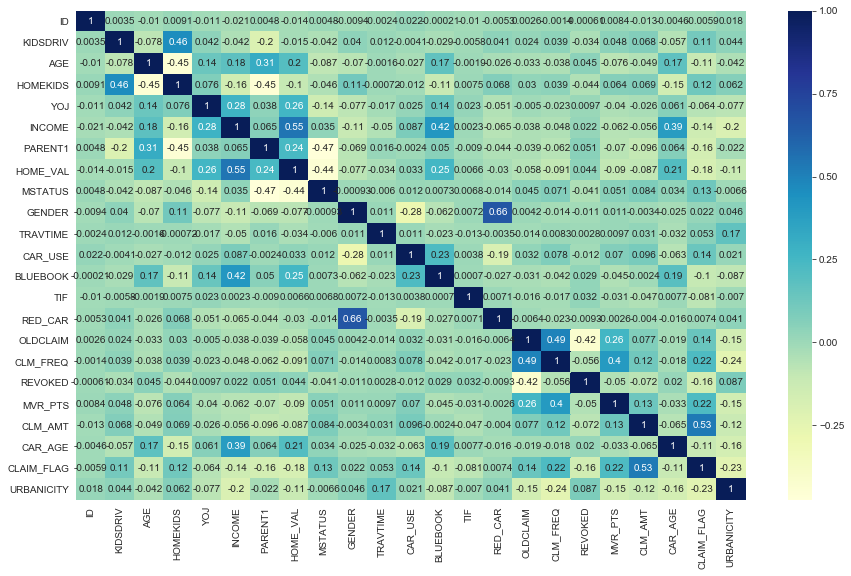

In [109]:
plt.figure(figsize=(15,9))
sns.heatmap(df.corr(),annot = True,cmap ='YlGnBu')

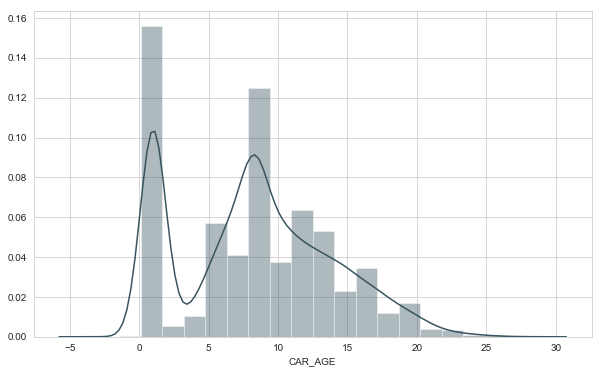

In [110]:
plt.figure(figsize=(10,6))
sns.distplot(df['CAR_AGE'],bins = 20)

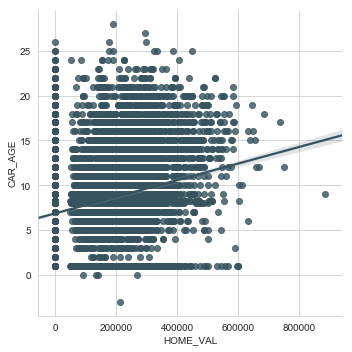

In [111]:
sns.lmplot(x='HOME_VAL',y='CAR_AGE',data=df)

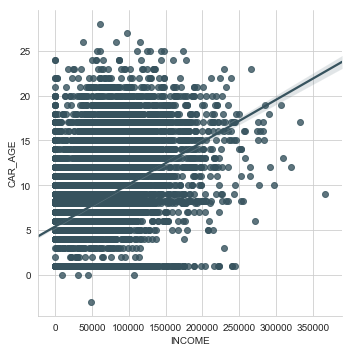

In [112]:
sns.lmplot(x='INCOME',y='CAR_AGE',data=df)

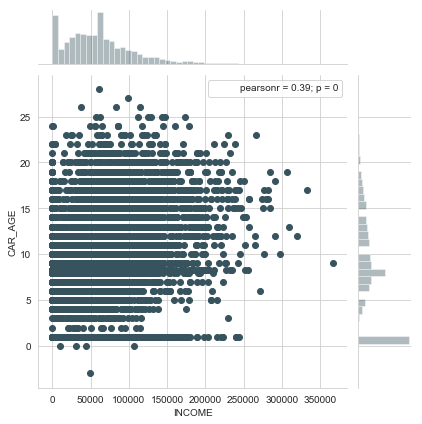

In [113]:
sns.set_palette("GnBu_d")
sns.jointplot(x='INCOME',y='CAR_AGE',kind='scatter',data=df,stat_func=pearsonr)

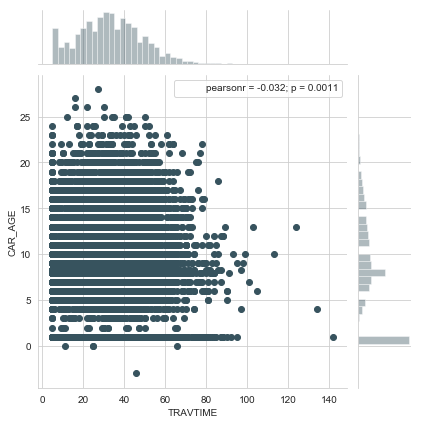

In [114]:
sns.jointplot(x='TRAVTIME',y='CAR_AGE',kind='scatter',data=df,stat_func=pearsonr)

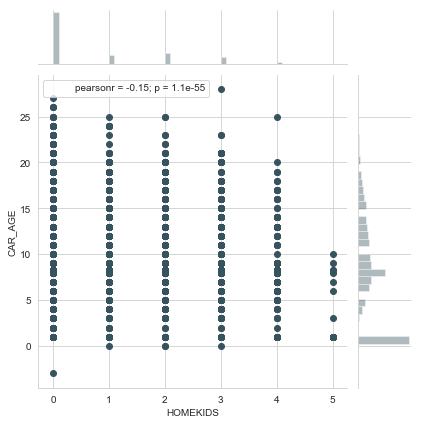

In [115]:
sns.set_palette("GnBu_d")
sns.jointplot(x='HOMEKIDS',y='CAR_AGE',kind='scatter',data=df,stat_func=pearsonr)

### DEFINING MODEL GENERAL FUNCTIONS

In [116]:
def calculate_cv_error(X_train,y_train):
    regr = LinearRegression()
    ms_errors= cross_val_score(regr, X_train, y_train, cv=5, scoring = make_scorer(mean_squared_error))
    rms_errors = np.sqrt(ms_errors)
    mean_rms_error = rms_errors.mean()
    return mean_rms_error

def build_OLS_model(X_train,y_train):
    ols_model = sm.OLS(y_train,X_train)
    return ols_model

def calculate_vif_(X, thresh=5.0):
    variables = list(range(X.shape[1]))
    dropped = True
    while dropped:
        dropped = False
        vif = [variance_inflation_factor(X.iloc[:, variables].values, ix)
               for ix in range(X.iloc[:, variables].shape[1])]

        maxloc = vif.index(max(vif))
        if max(vif) > thresh:
            print('dropping \'' + X.iloc[:, variables].columns[maxloc] +
                  '\' at index: ' + str(maxloc))
            del variables[maxloc]
            dropped = True

    print('Remaining variables:')
    print(X.columns[variables])
    return X.iloc[:, variables]

In [152]:
def evaluate_model(mod_df,cat_feats,i):
    final_data = pd.get_dummies(mod_df ,columns=cat_feats,drop_first=True)
    if i == 1 or  i == 2 or i ==3:
        cols = ['OCCUPATION_Doctor','OCCUPATION_Home Maker','OCCUPATION_Lawyer','OCCUPATION_Manager',
                'OCCUPATION_Professional','OCCUPATION_z_Blue Collar',
                'CAR_TYPE_Panel Truck','CAR_TYPE_Pickup','CAR_TYPE_Van','CAR_TYPE_z_SUV','CAR_TYPE_Sports Car','CAR_AGE']
        X = final_data.drop(cols,axis =1)
    else:
        X = final_data.drop('CAR_AGE',axis =1)
 
    y = final_data['CAR_AGE']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    print(f'\n\nModel {i + 1} Evaluation')
    print("Cross Validation Error: "+str(calculate_cv_error(X_train,y_train)))
    model = build_OLS_model(X_train,y_train)
    results = model.fit()
    print(results.summary())     
    return results
def pred_model(mod_df,cat_feats,i): 
    final_data = pd.get_dummies(mod_df ,columns=cat_feats,drop_first=True)
    if i == 1 or  i == 2 or i ==3 :
        cols = ['OCCUPATION_Doctor','OCCUPATION_Home Maker','OCCUPATION_Lawyer','OCCUPATION_Manager',
                'OCCUPATION_Professional','OCCUPATION_z_Blue Collar',
                'CAR_TYPE_Panel Truck','CAR_TYPE_Pickup','CAR_TYPE_Van','CAR_TYPE_z_SUV','CAR_TYPE_Sports Car','CAR_AGE']
        X = final_data.drop(cols,axis =1)
    else:
        X = final_data.drop('CAR_AGE',axis =1)    
    y = final_data['CAR_AGE']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    lm = LinearRegression()
    lm.fit(X_train,y_train)
    pred = lm.predict(X_test)
    plt.scatter(y_test,pred,alpha=0.4,marker='o',cmap='red')
    plt.xlabel('Y Test')
    plt.ylabel('Predicted Y')
    plt.show()
    print("""*****************************************************
    """)
    print('MAE:', metrics.mean_absolute_error(y_test, pred))
    print('MSE:', metrics.mean_squared_error(y_test, pred))
    print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))
    print("""*****************************************************
    """)
    sns.distplot((y_test-pred),bins=20)
    plt.show()

## Linear Regression

### Dropping put multi-collinear columns

In [143]:
mod_df = df.drop(['ID','BIRTH'],axis = 1)
cat_feats =['OCCUPATION','CAR_TYPE','EDUCATION']
final_data = pd.get_dummies(mod_df ,columns=cat_feats,drop_first=True)
calculate_vif_(final_data)

dropping 'AGE' at index: 1
dropping 'PARENT1' at index: 4
dropping 'YOJ' at index: 2
dropping 'BLUEBOOK' at index: 8
dropping 'REVOKED' at index: 12
dropping 'INCOME' at index: 2
dropping 'CAR_AGE' at index: 13
dropping 'GENDER' at index: 4
Remaining variables:
Index(['KIDSDRIV', 'HOMEKIDS', 'HOME_VAL', 'MSTATUS', 'TRAVTIME', 'CAR_USE',
       'TIF', 'RED_CAR', 'OLDCLAIM', 'CLM_FREQ', 'MVR_PTS', 'CLM_AMT',
       'CLAIM_FLAG', 'URBANICITY', 'OCCUPATION_Doctor',
       'OCCUPATION_Home Maker', 'OCCUPATION_Lawyer', 'OCCUPATION_Manager',
       'OCCUPATION_Professional', 'OCCUPATION_Student',
       'OCCUPATION_z_Blue Collar', 'CAR_TYPE_Panel Truck', 'CAR_TYPE_Pickup',
       'CAR_TYPE_Sports Car', 'CAR_TYPE_Van', 'CAR_TYPE_z_SUV',
       'EDUCATION_Bachelors', 'EDUCATION_Masters', 'EDUCATION_PhD',
       'EDUCATION_z_High School'],
      dtype='object')


KIDSDRIV  HOMEKIDS  HOME_VAL  MSTATUS  TRAVTIME  CAR_USE  TIF  RED_CAR  \
0             0         0      0.00        1        14        0   11        0   
1             0         0 257252.00        1        22        1    1        0   
2             0         0      0.00        1        26        0    1        0   
3             0         1 124191.00        0         5        0    4        1   
4             0         0 306251.00        0        32        0    7        0   
5             0         0 243925.00        0        36        0    1        1   
6             0         1      0.00        1        46        1    1        1   
7             0         0 154523.02        0        33        0    1        1   
8             1         1      0.00        1        21        0    6        1   
9             0         2      0.00        1        30        1   10        1   
10            1         2 333680.00        0        44        1    1        0   
11            0         0      0.00        1        34        0    1        1   
12            0         0      0.00        1        48        1    7        1   
13            0         0      0.00        1        15        0    1        1   
14            0         0 209970.00        0        36        0    7        1   
15            0         0 180232.00        0        25        1    7        0   
16            0         0      0.00        1        64        1    6        0   
17            0         2      0.00        1        74        0    6        1   
18            0         0 106859.00        0        48        0    1        1   
19            0         3 180951.00        1        43        0    6        1   
20            0         0      0.00        1        45        0    1        0   
21            0         0 192207.00        0        42        0    6        1   
22            0         3  91875.00        0        27        0    7        1   
23            0         2  93797.00        0        48        0    4        1   
24            0         1 170598.00        0        29        1    6        1   
25            0         0 154523.02        0        52        1    1        0   
26            0         0 282904.00        0        36        0    6        1   
27            0         0      0.00        1        29        0   10        1   
28            2         2  82344.00        0         8        0    6        1   
29            0         0 207519.00        0         7        1    1        1   
...         ...       ...       ...      ...       ...      ...  ...      ...   
10272         1         0 236725.00        0        56        1    1        1   
10273         0         0 209239.00        0         5        1    6        1   
10274         0         0 154523.02        1        45        1    4        1   
10275         0         0 331156.00        1        27        1    4        1   
10276         0         0 334777.00        0         9        0    4        0   
10277         0         0      0.00        1        36        0    8        1   
10278         0         0      0.00        0        32        1    6        1   
10279         0         0 227054.00        1        21        0    1        1   
10280         0         0 134977.00        0        60        0    3        1   
10281         0         0 266403.00        0        24        0    1        1   
10282         0         2 352524.00        1        10        0    1        1   
10283         0         3 232182.00        1        23        0    6        1   
10284         0         0 393624.00        0        42        0   10        1   
10285         0         0 289370.00        0        24        0   11        0   
10286         0         0 153061.00        1        33        0    1        1   
10287         0         0      0.00        1        16        1    6        0   
10288         0         0 291969.00        0        38        1    1        0   
10289         0         0 244889.00   

### MULTI LINEAR REGRESSION MODELS



Model 1 Evaluation
Cross Validation Error: 3.9314550903435377
                            OLS Regression Results                            
Dep. Variable:                CAR_AGE   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     1005.
Date:                Sat, 23 Feb 2019   Prob (F-statistic):               0.00
Time:                        19:43:20   Log-Likelihood:                -19230.
No. Observations:                6902   AIC:                         3.853e+04
Df Residuals:                    6865   BIC:                         3.879e+04
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------

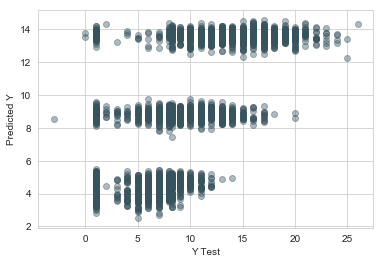

*****************************************************
    
MAE: 3.276483742205616
MSE: 15.678038057926015
RMSE: 3.9595502342975792
*****************************************************
    


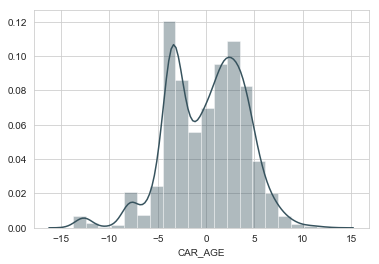

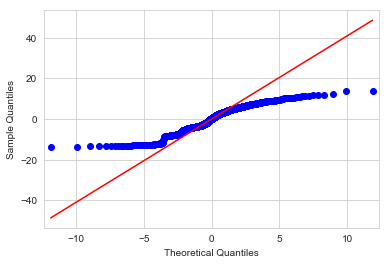



Model 2 Evaluation
Cross Validation Error: 3.925101128264033
                            OLS Regression Results                            
Dep. Variable:                CAR_AGE   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     2653.
Date:                Sat, 23 Feb 2019   Prob (F-statistic):               0.00
Time:                        19:43:21   Log-Likelihood:                -19244.
No. Observations:                6902   AIC:                         3.852e+04
Df Residuals:                    6888   BIC:                         3.861e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------

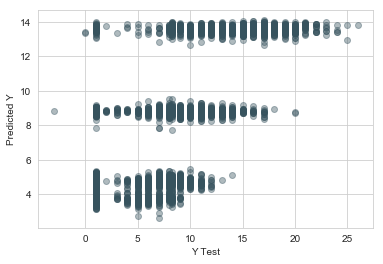

*****************************************************
    
MAE: 3.2736549003822795
MSE: 15.594098470287937
RMSE: 3.948936372023223
*****************************************************
    


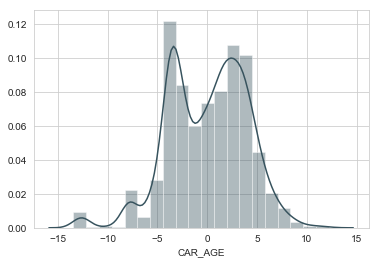

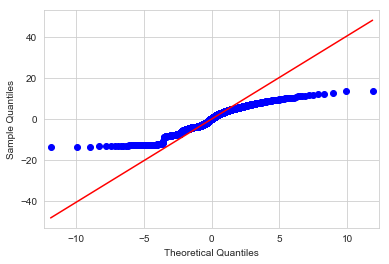



Model 3 Evaluation
Cross Validation Error: 3.926615795811311
                            OLS Regression Results                            
Dep. Variable:                CAR_AGE   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     3931.
Date:                Sat, 23 Feb 2019   Prob (F-statistic):               0.00
Time:                        19:43:22   Log-Likelihood:                -19387.
No. Observations:                6902   AIC:                         3.879e+04
Df Residuals:                    6893   BIC:                         3.885e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------

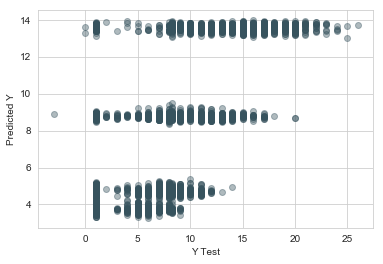

*****************************************************
    
MAE: 3.2710632634937067
MSE: 15.558285074652018
RMSE: 3.944399203256691
*****************************************************
    


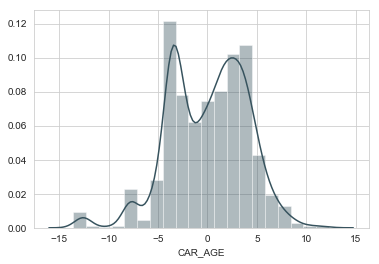

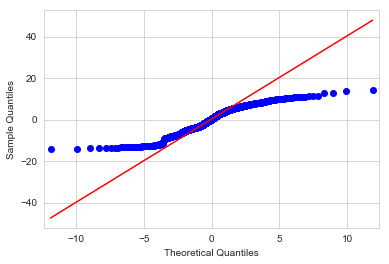

In [153]:
for i in range (3):
    if i == 0:
        mod_df = df.drop(['ID','BIRTH'],axis = 1)
        cat_feats =['OCCUPATION','CAR_TYPE','EDUCATION']
        results = evaluate_model(mod_df,cat_feats,i)
        pred_model(mod_df,cat_feats,i)
        res=results.resid
        fig = sm.qqplot(res, stats.t, distargs=(4,),line = 'q')
        plt.show()
     
    elif i == 1:
        mod_df = df.drop(['ID','BIRTH','KIDSDRIV','YOJ','INCOME','HOME_VAL','GENDER','CAR_USE','BLUEBOOK','TIF','OLDCLAIM','CLM_FREQ','MVR_PTS','URBANICITY'],axis = 1)
        cat_feats =['OCCUPATION','CAR_TYPE','EDUCATION']
        results = evaluate_model(mod_df,cat_feats,i)
        pred_model(mod_df,cat_feats,i)
        res=results.resid
        fig = sm.qqplot(res, stats.t, distargs=(4,),line = 'q')
        plt.show()
    else:
        mod_df = df.drop(['ID','BIRTH','KIDSDRIV','YOJ','INCOME','HOME_VAL','GENDER','CAR_USE','BLUEBOOK','TIF','OLDCLAIM','CLM_FREQ','MVR_PTS','URBANICITY','CLM_AMT','AGE','PARENT1','REVOKED','CLAIM_FLAG'],axis = 1)
        cat_feats =['OCCUPATION','CAR_TYPE','EDUCATION']
        results = evaluate_model(mod_df,cat_feats,i)
        pred_model(mod_df,cat_feats,i)
        res=results.resid
        fig = sm.qqplot(res, stats.t, distargs=(4,),line = 'q')
        plt.show()
    

### Adding interaction term



Model 4 Evaluation
Cross Validation Error: 3.9253216712904773
                            OLS Regression Results                            
Dep. Variable:                CAR_AGE   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     3278.
Date:                Sat, 23 Feb 2019   Prob (F-statistic):               0.00
Time:                        19:44:17   Log-Likelihood:                -19330.
No. Observations:                6902   AIC:                         3.868e+04
Df Residuals:                    6891   BIC:                         3.876e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

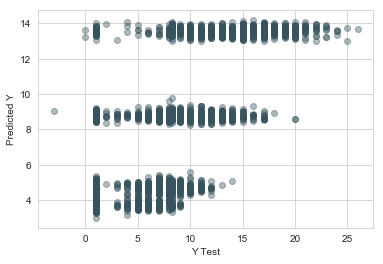

*****************************************************
    
MAE: 3.2699426647796366
MSE: 15.557693457064017
RMSE: 3.944324207904824
*****************************************************
    


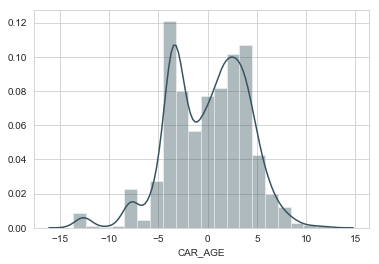

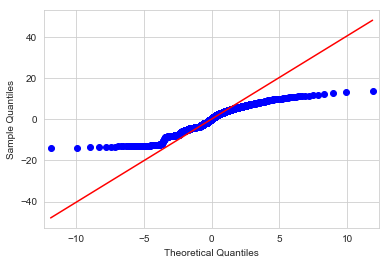

In [155]:
mod_df = df.drop(['ID','BIRTH','KIDSDRIV','YOJ','INCOME','HOME_VAL','GENDER','CAR_USE','BLUEBOOK','TIF','OLDCLAIM','CLM_FREQ','MVR_PTS','URBANICITY','CLM_AMT','AGE','PARENT1','REVOKED','CLAIM_FLAG'],axis = 1)
cat_feats =['OCCUPATION','CAR_TYPE','EDUCATION']
mod_df['RED_CAR  * TRAVTIME'] = mod_df['RED_CAR'] * mod_df['TRAVTIME']
mod_df['HOMEKIDS * MSTATUS'] = mod_df['HOMEKIDS'] * mod_df['MSTATUS']
results = evaluate_model(mod_df,cat_feats,i=3)
pred_model(mod_df,cat_feats,i=3)
res=results.resid
fig = sm.qqplot(res, stats.t, distargs=(4,),line = 'q')
plt.show()

## Ridge Regression

In [103]:
def ridge_reg(i):
    mod_df = df.drop(['ID','BIRTH','KIDSDRIV','YOJ','INCOME','HOME_VAL','GENDER','CAR_USE','BLUEBOOK','TIF','OLDCLAIM','CLM_FREQ','MVR_PTS','URBANICITY','CLM_AMT','AGE','PARENT1','REVOKED','CLAIM_FLAG'],axis = 1)
    cat_feats =['OCCUPATION','CAR_TYPE','EDUCATION']
    mod_df['RED_CAR  * TRAVTIME'] = mod_df['RED_CAR'] * mod_df['TRAVTIME']
    mod_df['HOMEKIDS * MSTATUS'] = mod_df['HOMEKIDS'] * mod_df['MSTATUS']
    final_data = pd.get_dummies(mod_df ,columns=cat_feats,drop_first=True)
    cols = ['OCCUPATION_Doctor','OCCUPATION_Home Maker','OCCUPATION_Lawyer','OCCUPATION_Manager',
            'OCCUPATION_Professional','OCCUPATION_z_Blue Collar',
    
            'CAR_TYPE_Panel Truck','CAR_TYPE_Pickup','CAR_TYPE_Van','CAR_TYPE_z_SUV','CAR_TYPE_Sports Car','CAR_AGE']
    X = final_data.drop(cols,axis =1)   
    y = final_data['CAR_AGE']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    ridge = Ridge(fit_intercept=True, alpha = i)
    ridge.fit(X_train,y_train)
    y_pred = ridge.predict(X_test)
    MAE = metrics.mean_absolute_error(y_test, y_pred)
    MSE = metrics.mean_squared_error(y_test, y_pred)
    RMSE= np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    CV_ERR = ridge_cross_validation(ridge)
    return (MAE,MSE,RMSE,CV_ERR)

    
def ridge_cross_validation(ridge):
    mod_df = df.drop(['ID','BIRTH','KIDSDRIV','YOJ','INCOME','HOME_VAL','GENDER','CAR_USE','BLUEBOOK','TIF','OLDCLAIM','CLM_FREQ','MVR_PTS','URBANICITY','CLM_AMT','AGE','PARENT1','REVOKED','CLAIM_FLAG'],axis = 1)
    cat_feats =['OCCUPATION','CAR_TYPE','EDUCATION']
    mod_df['RED_CAR  * TRAVTIME'] = mod_df['RED_CAR'] * mod_df['TRAVTIME']
    mod_df['HOMEKIDS * MSTATUS'] = mod_df['HOMEKIDS'] * mod_df['MSTATUS']
    final_data = pd.get_dummies(mod_df ,columns=cat_feats,drop_first=True)
    cols = ['OCCUPATION_Doctor','OCCUPATION_Home Maker','OCCUPATION_Lawyer','OCCUPATION_Manager',
            'OCCUPATION_Professional','OCCUPATION_z_Blue Collar',
            'CAR_TYPE_Panel Truck','CAR_TYPE_Pickup','CAR_TYPE_Van','CAR_TYPE_z_SUV','CAR_TYPE_Sports Car','CAR_AGE']
    X = np.array(final_data.drop(cols,axis =1))
    y = np.array(final_data['CAR_AGE'])
    kf = KFold(n_splits=5)
    kf.get_n_splits(X)
    scores = []
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        ridge.fit(X_train,y_train)
        scores.append(np.sqrt(metrics.mean_squared_error(y_test, ridge.predict(X_test))))
    return sum(scores)/len(scores)

In [104]:
MAE,MSE,RMSE,CV_ERR = ridge_reg(0.5)
print("""*****************************************************
""")
print('MAE:', MAE)
print('MSE:', MSE)
print('RMSE:', RMSE)
print("""*****************************************************
""")
print("Cross Validation Error: ",CV_ERR)

*****************************************************

MAE: 3.2702177266129886
MSE: 15.558349639782357
RMSE: 3.944407387654368
*****************************************************

Cross Validation Error:  3.9312165425487064


### Finding Best Aplha value

*****************Ridge Regression*******************
Alpha	 RMSE_train	 RMSE_Cross_Validation
****************************************************
0.0100	 3.94433		 3.93121
0.4180	 3.94439		 3.93122
0.8259	 3.94447		 3.93122
1.2339	 3.94454		 3.93123
1.6418	 3.94463		 3.93125
2.0498	 3.94471		 3.93127
2.4578	 3.94481		 3.93129
2.8657	 3.94490		 3.93131
3.2737	 3.94501		 3.93134
3.6816	 3.94511		 3.93138
4.0896	 3.94523		 3.93142
4.4976	 3.94534		 3.93146
4.9055	 3.94546		 3.93150
5.3135	 3.94559		 3.93155
5.7214	 3.94572		 3.93160
6.1294	 3.94585		 3.93166
6.5373	 3.94599		 3.93172
6.9453	 3.94614		 3.93178
7.3533	 3.94628		 3.93185
7.7612	 3.94644		 3.93192
8.1692	 3.94659		 3.93199
8.5771	 3.94675		 3.93207
8.9851	 3.94692		 3.93215
9.3931	 3.94708		 3.93223
9.8010	 3.94726		 3.93232
10.2090	 3.94743		 3.93241
10.6169	 3.94761		 3.93250
11.0249	 3.94780		 3.93260
11.4329	 3.94798		 3.93270
11.8408	 3.94817		 3.93280
12.2488	 3.94837		 3.93290
12.6567	 3.94857		 3.93301
13.0647	 3.948

Text(0.5, 0, 'Alpha')

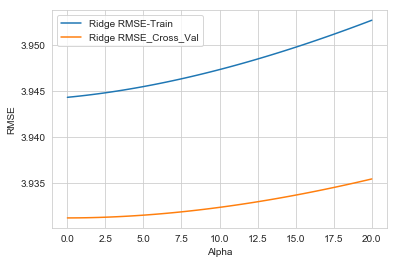

In [110]:
print('*****************Ridge Regression*******************')
print('Alpha\t RMSE_train\t RMSE_Cross_Validation')
print('****************************************************')
alpha = np.linspace(.01,20,50)
t_rmse = []
cv_rmse = []

for i in alpha:
    MAE,MSE,RMSE,CV_ERR = ridge_reg(i)
    t_rmse.append(RMSE)
    cv_rmse.append(CV_ERR)
    print('{:.4f}\t {:.5f}\t\t {:.5f}'.format(i,RMSE,CV_ERR))
plt.plot(alpha, t_rmse, label='RMSE-Train')
plt.plot(alpha, cv_rmse, label='RMSE_Cross_Val')
plt.legend( ('Ridge RMSE-Train', 'Ridge RMSE_Cross_Val') )
plt.ylabel('RMSE')
plt.xlabel('Alpha')


## Logistic Regression

In [125]:
sns.jointplot

<function seaborn.axisgrid.jointplot(x, y, data=None, kind='scatter', stat_func=None, color=None, height=6, ratio=5, space=0.2, dropna=True, xlim=None, ylim=None, joint_kws=None, marginal_kws=None, annot_kws=None, **kwargs)>

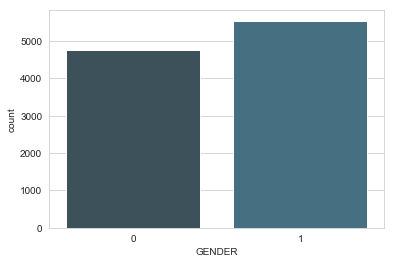

In [126]:
sns.countplot(x='GENDER',data=df)

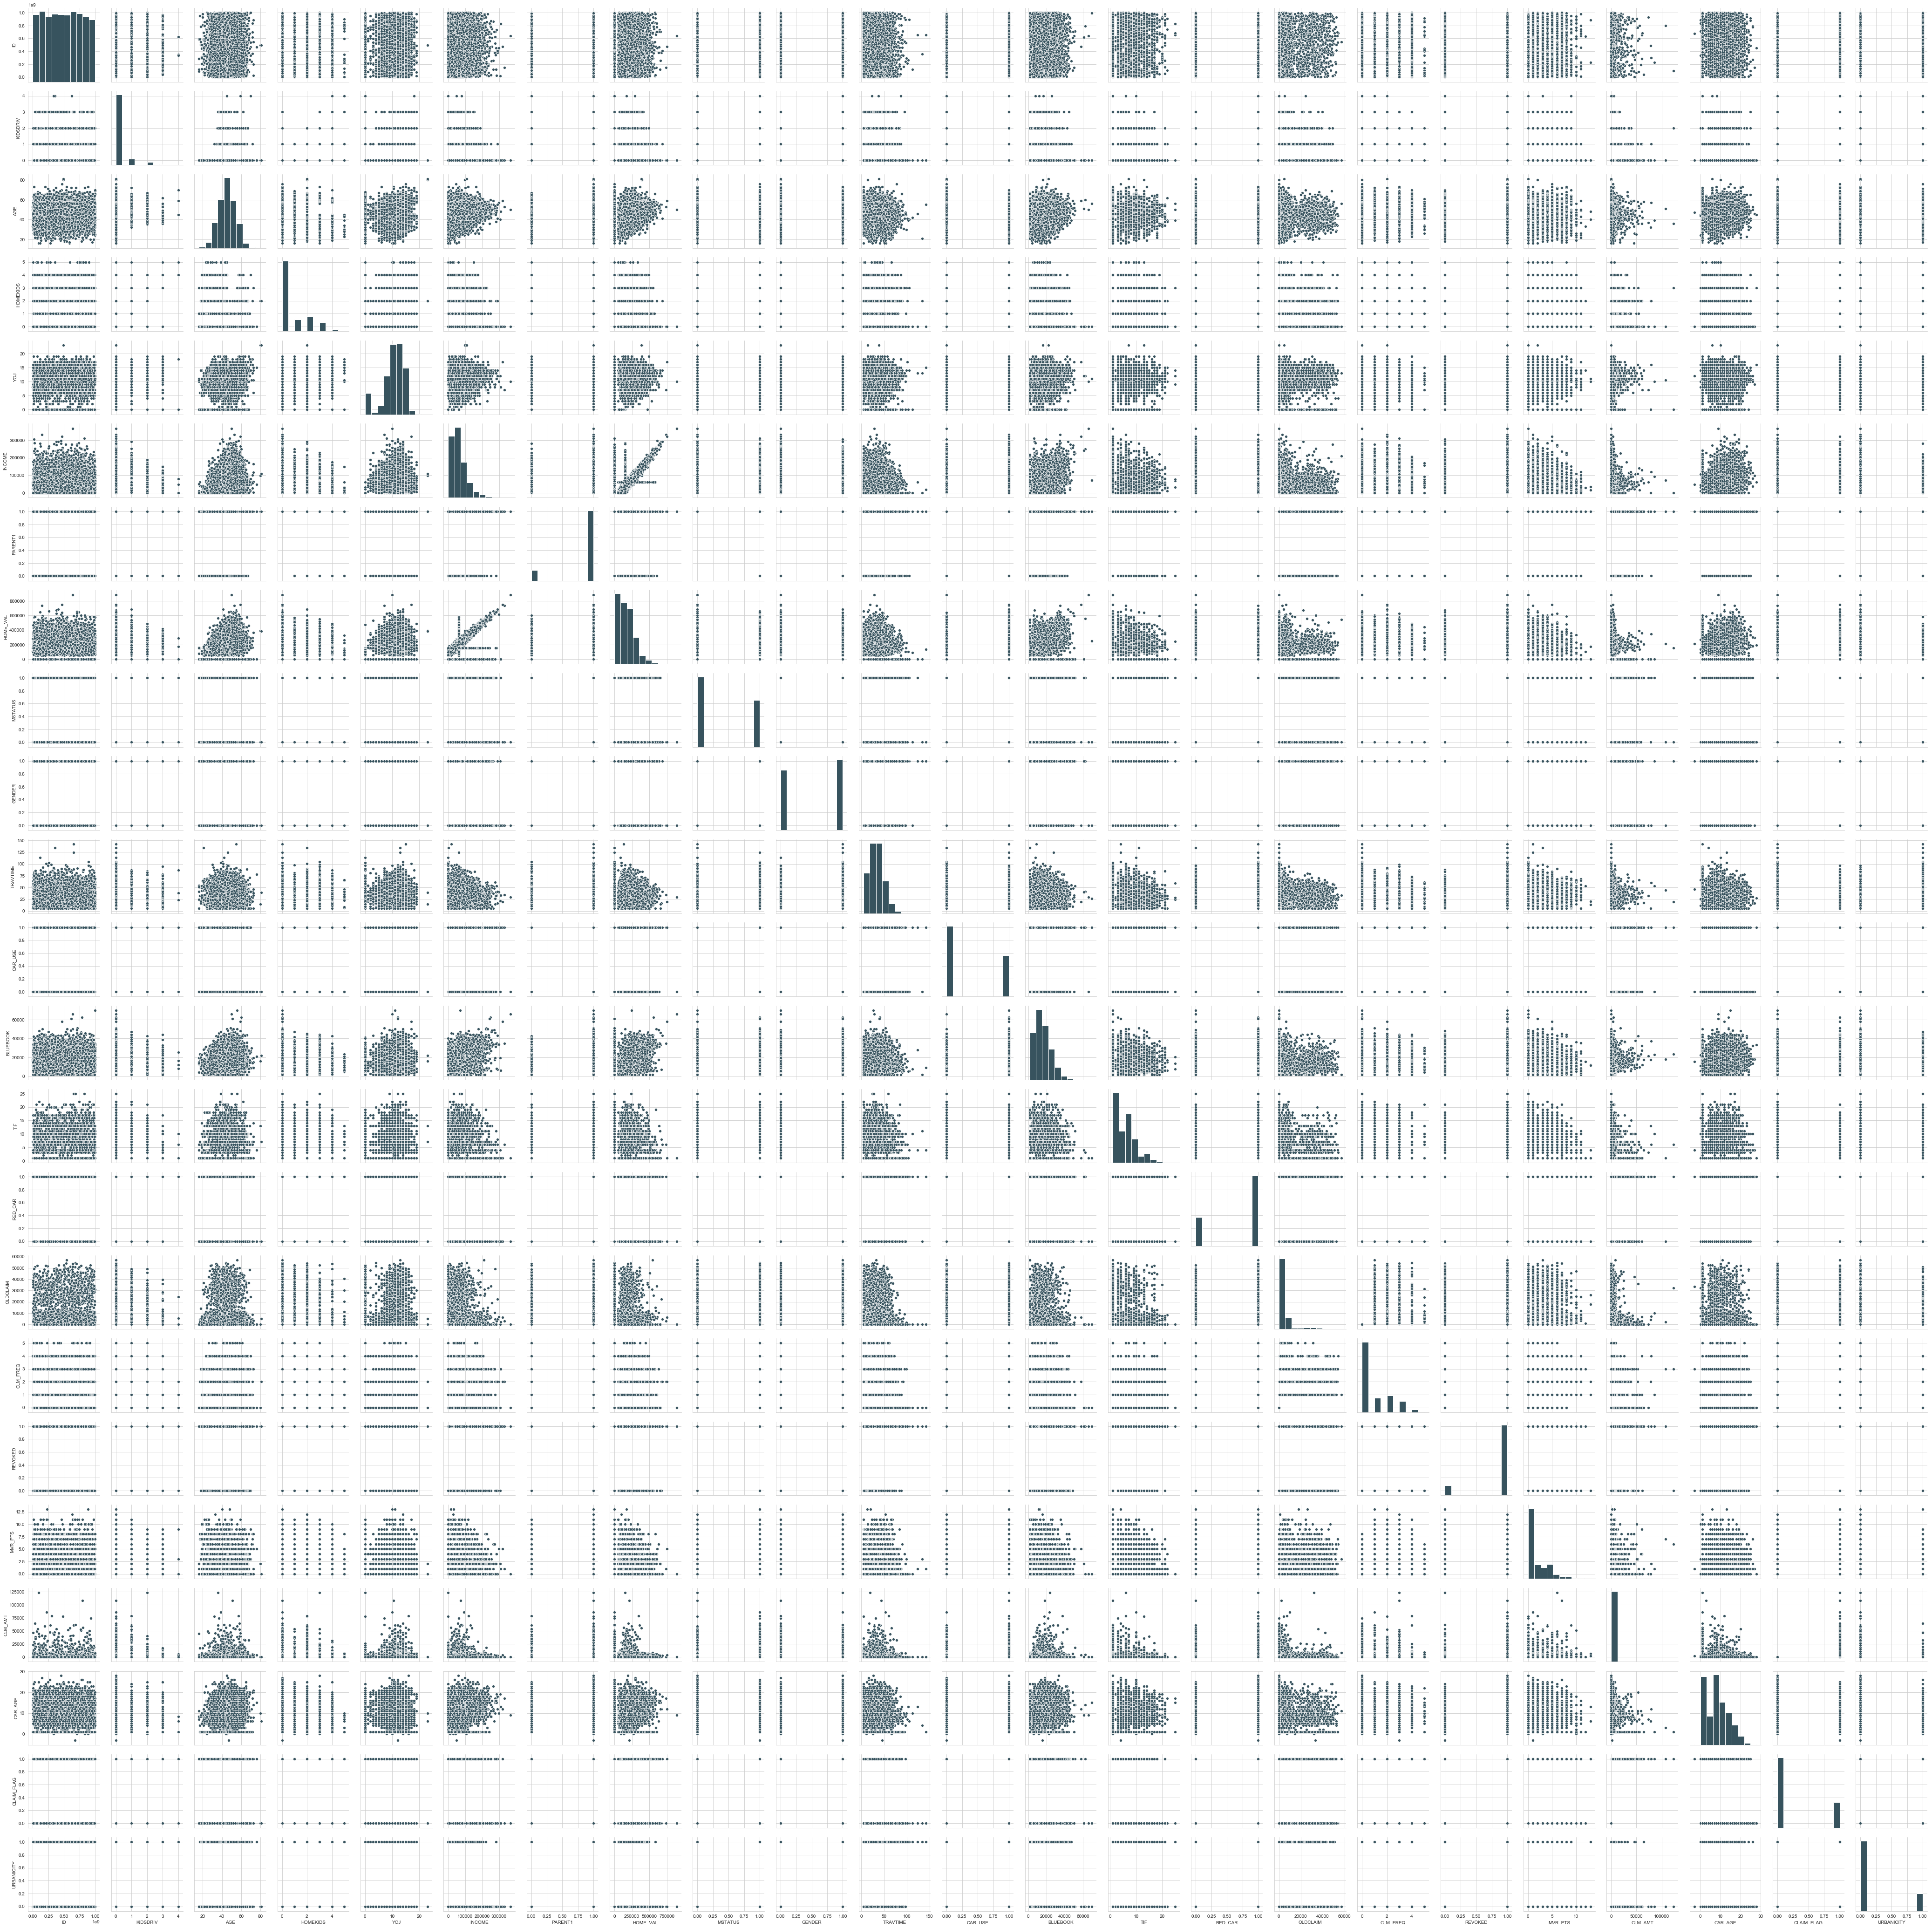

In [127]:
sns.pairplot(df,palette='bwr')

In [128]:
def evaluate_classification(mod_df,cat_feats,i):
    if i==0:
        model_name = 'Logistic_Regression_Model_1'
    elif i ==1:
        model_name = 'Logistic_Regression_Model_2'
    else:
        model_name = 'Logistic_Regression_Model_3'
    final_data = pd.get_dummies(mod_df ,columns=cat_feats,drop_first=True)
    X = final_data.drop('GENDER',axis = 1)
    y = final_data['GENDER']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    logit_model=sm.Logit(y_train,X_train.astype(float))
    result=logit_model.fit()
    print(f'{model_name}:\n{result.summary2()}')
    logmodel = LogisticRegression()
    logmodel.fit(X_train,y_train)
    predictions = logmodel.predict(X_test)
    print(f'\nClassification Report:\n{classification_report(y_test,predictions)}')
    print('')
    print(f'\nConfusion Matrix:\n{confusion_matrix(y_test,predictions)}')
    print('')
 

In [129]:
for i in range (3):
    if i ==0:
        mod_df = df.drop(['ID','BIRTH'],axis = 1)
        cat_feats =['EDUCATION','OCCUPATION','CAR_TYPE']          
        evaluate_classification(mod_df,cat_feats,i)
    elif i ==1:
        mod_df = df.drop(['ID','BIRTH','EDUCATION','MSTATUS','TRAVTIME','PARENT1','TIF','CLM_FREQ','MVR_PTS','CLM_AMT','CAR_AGE'],axis = 1)
        cat_feats =['OCCUPATION','CAR_TYPE']          
        evaluate_classification(mod_df,cat_feats,i)
    else:
        mod_df = df.drop(['ID','BIRTH','EDUCATION','MSTATUS','TRAVTIME','PARENT1','TIF','CLM_FREQ','MVR_PTS','CLM_AMT','CAR_AGE','INCOME','CAR_USE'],axis = 1)
        cat_feats =['OCCUPATION','CAR_TYPE']          
        evaluate_classification(mod_df,cat_feats,i)        
        

Optimization terminated successfully.
         Current function value: 0.206365
         Iterations 9
Logistic_Regression_Model_1:
                             Results: Logit
Model:                 Logit               Pseudo R-squared:    0.701    
Dependent Variable:    GENDER              AIC:                 2922.6568
Date:                  2019-02-23 18:51    BIC:                 3175.7208
No. Observations:      6902                Log-Likelihood:      -1424.3  
Df Model:              36                  LL-Null:             -4761.8  
Df Residuals:          6865                LLR p-value:         0.0000   
Converged:             1.0000              Scale:               1.0000   
No. Iterations:        9.0000                                            
-------------------------------------------------------------------------
                          Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------------
KIDSDRIV   

##  License

Copyright 2019 Anand Kumar

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.